In [2]:
from keras.datasets import imdb
import numpy as np

((XT, YT),(Xt, Yt)) = imdb.load_data(num_words=10000)
print(len(XT))
print(len(Xt))

#get the associated integer values for the corresponding words
word_idx= imdb.get_word_index()
print(type(word_idx))
print(type(word_idx.items()))
print(word_idx)

idx_word= dict([value, key] for (key, value) in word_idx.items())
print(idx_word)

actual_review = ' '.join([idx_word.get(idx-3,'?') for  idx in XT[0]])
print(actual_review)

#vectorize the sentences 
# the vocab size is 10000 , make sure every vector is implemented by a size of 10000

def vectorize_sentences(sentence, dim=10000):
  output= np.zeros((len(sentence), dim))

  for i , idx in enumerate(sentence):
    output[i,idx]= 1
  return output

Xtrain= vectorize_sentences(XT)
Xtest= vectorize_sentences(Xt)

print(Xtrain.shape)
Ytrain= np.asarray(YT).astype('float32')
Ytest= np.asarray(Yt).astype('float32')
print(Yt.shape)



Using TensorFlow backend.


17465344/17464789 [==============================] - 7s 0us/step
25000
25000
1646592/1641221 [==============================] - 5s 3us/step


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(25000, 10000)
(25000,)


# Define your model architecture
-use fully connected dense layers with RelU activation

-2 hidden layers with 16 units each

-1 output layes with 1 unit




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
(5000, 10000)
Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 3s 135us/step - loss: 0.5104 - accuracy: 0.8184 - val_loss: 0.4294 - val_accuracy: 0.8166
Epoch 2/5
20000/20000 [==============================] - 3s 129us/step - loss: 0.3129 - accuracy: 0.9024 - val_loss: 0.3006 - val_accuracy: 0.8858
Epoch 3/5
20000/20000

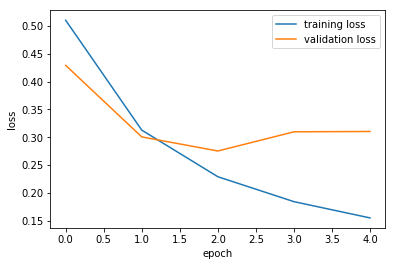

In [4]:
from keras.layers import Dense
from keras import models

#define the model 

model = models.Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16,activation='relu' ))
model.add(Dense(1,activation='sigmoid'))



#compile the model

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Training and Validation

x_val= Xtrain[:5000]
x_train_new= Xtrain[5000:]

y_val= Ytrain[:5000]
y_train_new= Ytrain[5000:]
print(x_val.shape)

#training your model

hist= model.fit(x_train_new, y_train_new,batch_size=512, epochs= 5, validation_data=(x_val, y_val) )

# visualize our results

import matplotlib.pyplot as plt
h = hist.history

plt.plot(h['loss'], label ='training loss')
plt.plot(h['val_loss'], label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()



In [5]:
print (h)

{'val_loss': [0.42935873456001283, 0.3006374450206757, 0.2753290483474731, 0.30980056190490723, 0.3104305304527283], 'val_accuracy': [0.8166000247001648, 0.8858000040054321, 0.8871999979019165, 0.8766000270843506, 0.8776000142097473], 'loss': [0.5104426965236664, 0.31287382864952085, 0.22901421589851378, 0.18421680529117584, 0.15497038826942444], 'accuracy': [0.81845, 0.90235, 0.92325, 0.9386, 0.9475]}


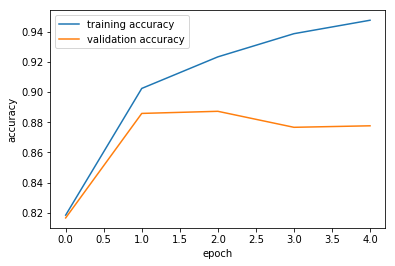

25000/25000 [==============================] - 4s 150us/step
[[0.13755906]
 [0.9996117 ]
 [0.20925248]
 ...
 [0.06994438]
 [0.05662906]
 [0.2838338 ]]
[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [6]:
plt.plot(h['accuracy'], label ='training accuracy')
plt.plot(h['val_accuracy'], label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Evaluating the model using training data

model.evaluate(Xtest, Ytest)

model.evaluate(Xtrain, Ytrain)

temp=model.predict(Xtest)
result= np.zeros(temp.shape)
result[temp>=0.5]=1
print(temp)
print(result)

